In [42]:
import os
import pandas as pd
from config import config
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [43]:
def add_day(data):
    data['Day'] += 1
    max_day = calendar.monthrange(data['Year'], data['Month'])[1]
    if data['Day'] > max_day:
        data['Day'] = 1
        data['Month'] += 1
        if data['Month'] > 12:
            data['Month'] = 1
            data['Year'] += 1
    return data

def convert_time(data):
    if data['ObsTime'] == '24':
        data = add_day(data)
        data['ObsTime'] = '00'
    return data

In [44]:
df = pd.read_csv(os.path.join(config['path'], f'{config["station_id"]}-combined.csv'))
df['ObsTime'] = df['ObsTime'].apply(lambda x: '{:02d}'.format(x))
df = df.apply(convert_time, axis=1)
df['datetime'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str) + ' ' + df['ObsTime'].astype(str) + ':00:00'
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df

,Year,Month,Day,ObsTime,StnPres,Temperature,RH,WS,WD,Precp
datetime,,,,,,,,,,
2011-12-01 01:00:00,2011,12,1,01,999.5,21.7,82,2.0,336,0.0
2011-12-01 02:00:00,2011,12,1,02,998.9,20.9,81,3.3,332,0.0
2011-12-01 03:00:00,2011,12,1,03,999.2,20.7,78,3.2,353,0.0
2011-12-01 04:00:00,2011,12,1,04,999.4,20.6,78,3.6,350,0.0
2011-12-01 05:00:00,2011,12,1,05,998.9,20.0,79,3.6,349,&
...,...,...,...,...,...,...,...,...,...,...
2011-12-31 20:00:00,2011,12,31,20,1007.1,15.7,82,2.0,354,0.0
2011-12-31 21:00:00,2011,12,31,21,1007.2,15.3,83,3.1,321,0.0
2011-12-31 22:00:00,2011,12,31,22,1007.5,15.4,80,3.2,340,0.0


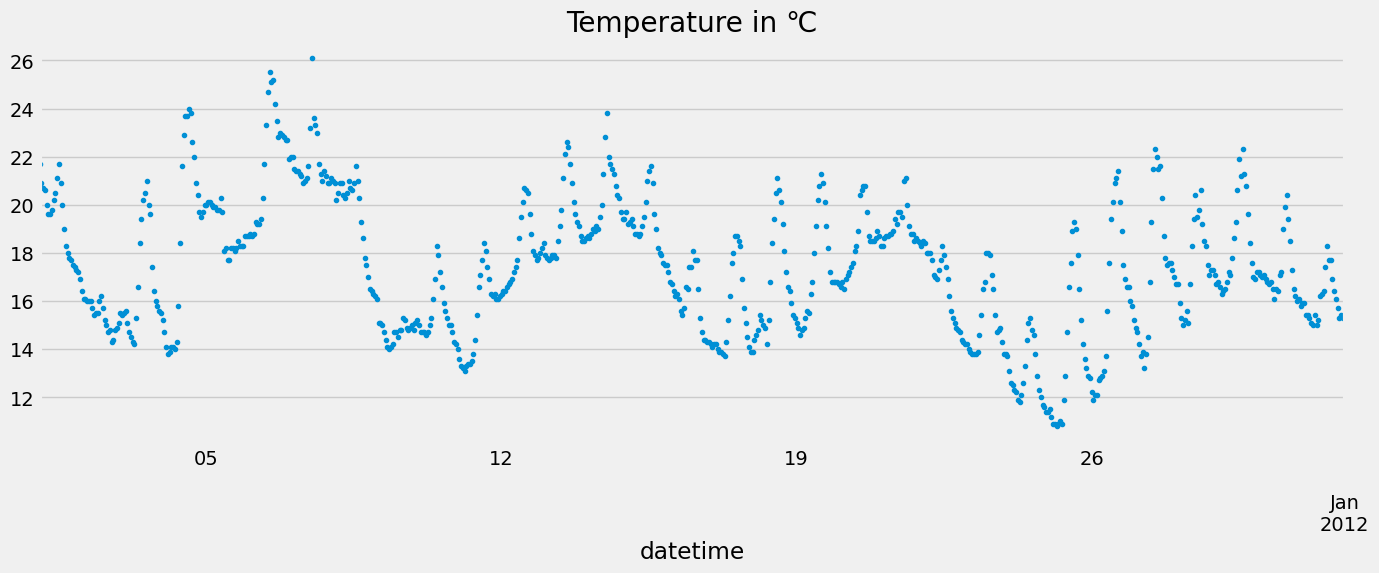

In [54]:
temp_data = df['Temperature']
temp_data.plot(style='.',
               figsize=(15, 5),
               color=color_pal[0],
               title='Temperature in ℃')
plt.show()